In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

## scaling
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
## pipeline
from sklearn.pipeline import Pipeline, FeatureUnion



In [209]:
df = pd.read_excel('/kaggle/input/flight-data/Data_Train.xlsx')

In [210]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [212]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [213]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

In [214]:
df['Month']=df['Date_of_Journey'].dt.month

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(9)
memory usage: 959.9+ KB


In [216]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [217]:
df['Additional_Info'].replace(to_replace='No Info',value='No info',inplace=True)

In [218]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [219]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3


In [220]:
# Format Dep_Time and Arrival_Time to include only hour and minute
df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%M')
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time']).dt.strftime('%H:%M')

<ipython-input-220-115c91294c7d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Time'] = pd.to_datetime(df['Dep_Time']).dt.strftime('%H:%M')
<ipython-input-220-115c91294c7d>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time']).dt.strftime('%H:%M')


In [221]:
# Ensure Date_of_Journey, Dep_Time, and Arrival_Time are in the correct format
df['Date_of_Journey'] = df['Date_of_Journey'].astype(str)  # Ensure Date_of_Journey is a string
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'], format='%H:%M')  # Convert Dep_Time to datetime
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'], format='%H:%M')  # Convert Arrival_Time to datetime

# Combine Date_of_Journey with Dep_Time and Arrival_Time
df['Dep_Time'] = pd.to_datetime(df['Date_of_Journey'] + ' ' + df['Dep_Time'].dt.strftime('%H:%M'))
df['Arrival_Time'] = pd.to_datetime(df['Date_of_Journey'] + ' ' + df['Arrival_Time'].dt.strftime('%H:%M'))

# Adjust Arrival_Time for overnight journeys
df['Arrival_Time'] = df.apply(
    lambda row: row['Arrival_Time'] + pd.Timedelta(days=1) if row['Arrival_Time'] < row['Dep_Time'] else row['Arrival_Time'],
    axis=1
)



In [222]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,2h 50m,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,7h 25m,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,19h,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,5h 25m,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,4h 45m,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,2h 30m,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,2h 35m,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,3h,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,2h 40m,non-stop,No info,12648,3


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  object        
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  datetime64[ns]
 6   Arrival_Time     10683 non-null  datetime64[ns]
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
 11  Month            10683 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(1), object(8)
memory usage: 959.9+ KB


In [224]:
# Calculate duration
df['Duration2'] = df['Arrival_Time'] - df['Dep_Time']

# Optionally format the duration
df['Duration_Hours_Minutes'] = df['Duration2'].apply(lambda x: f"{x.components.hours}h {x.components.minutes}m" if x.components.minutes != 0 else f"{x.components.hours}h")

print(df[['Dep_Time', 'Arrival_Time', 'Duration', 'Duration_Hours_Minutes']])



                 Dep_Time        Arrival_Time Duration Duration_Hours_Minutes
0     2019-03-24 22:20:00 2019-03-25 01:10:00   2h 50m                 2h 50m
1     2019-05-01 05:50:00 2019-05-01 13:15:00   7h 25m                 7h 25m
2     2019-06-09 09:25:00 2019-06-10 04:25:00      19h                    19h
3     2019-05-12 18:05:00 2019-05-12 23:30:00   5h 25m                 5h 25m
4     2019-03-01 16:50:00 2019-03-01 21:35:00   4h 45m                 4h 45m
...                   ...                 ...      ...                    ...
10678 2019-04-09 19:55:00 2019-04-09 22:25:00   2h 30m                 2h 30m
10679 2019-04-27 20:45:00 2019-04-27 23:20:00   2h 35m                 2h 35m
10680 2019-04-27 08:20:00 2019-04-27 11:20:00       3h                     3h
10681 2019-03-01 11:30:00 2019-03-01 14:10:00   2h 40m                 2h 40m
10682 2019-05-09 10:55:00 2019-05-09 19:15:00   8h 20m                 8h 20m

[10683 rows x 4 columns]


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   Airline                 10683 non-null  object         
 1   Date_of_Journey         10683 non-null  object         
 2   Source                  10683 non-null  object         
 3   Destination             10683 non-null  object         
 4   Route                   10682 non-null  object         
 5   Dep_Time                10683 non-null  datetime64[ns] 
 6   Arrival_Time            10683 non-null  datetime64[ns] 
 7   Duration                10683 non-null  object         
 8   Total_Stops             10682 non-null  object         
 9   Additional_Info         10683 non-null  object         
 10  Price                   10683 non-null  int64          
 11  Month                   10683 non-null  int32          
 12  Duration2               10683 no

In [226]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Duration2,Duration_Hours_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,2h 50m,non-stop,No info,3897,3,0 days 02:50:00,2h 50m
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,7h 25m,2 stops,No info,7662,5,0 days 07:25:00,7h 25m
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,19h,2 stops,No info,13882,6,0 days 19:00:00,19h
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,5h 25m,1 stop,No info,6218,5,0 days 05:25:00,5h 25m
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,4h 45m,1 stop,No info,13302,3,0 days 04:45:00,4h 45m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,2h 30m,non-stop,No info,4107,4,0 days 02:30:00,2h 30m
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,2h 35m,non-stop,No info,4145,4,0 days 02:35:00,2h 35m
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,3h,non-stop,No info,7229,4,0 days 03:00:00,3h
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,2h 40m,non-stop,No info,12648,3,0 days 02:40:00,2h 40m


In [227]:
# Convert columns to Timedelta type
df['Duration'] = pd.to_timedelta(df['Duration'])
df['Duration_Hours_Minutes'] = pd.to_timedelta(df['Duration_Hours_Minutes'])



In [228]:
 (df['Duration'] - df['Duration_Hours_Minutes'] > pd.Timedelta(0)).sum()

1120

In [229]:
df['Duration'] = df['Duration'].apply(pd.to_timedelta)



In [230]:
 df['Arrival_Time']= df['Dep_Time'] + df['Duration'] 

In [231]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Duration2,Duration_Hours_Minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,3,0 days 02:50:00,0 days 02:50:00
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5,0 days 07:25:00,0 days 07:25:00
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882,6,0 days 19:00:00,0 days 19:00:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1 stop,No info,6218,5,0 days 05:25:00,0 days 05:25:00
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3,0 days 04:45:00,0 days 04:45:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,non-stop,No info,4107,4,0 days 02:30:00,0 days 02:30:00
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,4,0 days 02:35:00,0 days 02:35:00
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,4,0 days 03:00:00,0 days 03:00:00
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3,0 days 02:40:00,0 days 02:40:00


In [232]:
df.drop(columns=['Duration2','Duration_Hours_Minutes'],inplace=True)

In [233]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3


In [234]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,non-stop,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2 stops,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2 stops,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1 stop,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1 stop,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,non-stop,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,non-stop,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,non-stop,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,non-stop,No info,12648,3


In [235]:
 df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [236]:
df['Total_Stops'] = df['Total_Stops'].str.replace('non-stop', '0 stop')

In [237]:
df['Total_Stops'] = df['Total_Stops'].fillna('0 stop')

In [238]:
 df['Total_Stops'].unique

<bound method Series.unique of 0         0 stop
1        2 stops
2        2 stops
3         1 stop
4         1 stop
          ...   
10678     0 stop
10679     0 stop
10680     0 stop
10681     0 stop
10682    2 stops
Name: Total_Stops, Length: 10683, dtype: object>

In [239]:

df['Total_Stops'] = df['Total_Stops'].str.replace(r'\D', '', regex=True).astype(int)

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   Airline          10683 non-null  object         
 1   Date_of_Journey  10683 non-null  object         
 2   Source           10683 non-null  object         
 3   Destination      10683 non-null  object         
 4   Route            10682 non-null  object         
 5   Dep_Time         10683 non-null  datetime64[ns] 
 6   Arrival_Time     10683 non-null  datetime64[ns] 
 7   Duration         10683 non-null  timedelta64[ns]
 8   Total_Stops      10683 non-null  int64          
 9   Additional_Info  10683 non-null  object         
 10  Price            10683 non-null  int64          
 11  Month            10683 non-null  int32          
dtypes: datetime64[ns](2), int32(1), int64(2), object(6), timedelta64[ns](1)
memory usage: 959.9+ KB


In [241]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,0,No info,3897,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2,No info,7662,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2,No info,13882,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1,No info,6218,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,0,No info,4107,4
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,0,No info,4145,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,0,No info,7229,4
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,0,No info,12648,3


In [242]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
9039,Air India,2019-05-06,Delhi,Cochin,NaN,2019-05-06 09:45:00,2019-05-07 09:25:00,0 days 23:40:00,0,No info,7480,5


In [243]:
df.dropna(subset=['Route'], inplace=True)


In [244]:
df[df['Route'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month


In [245]:
df['stops'] = df['Route'].str.count('→') - 1


In [246]:
(df['Total_Stops']-df['stops'] ).unique()

array([0])

In [247]:
df.drop(columns='stops',inplace=True)

In [248]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]

Airline            0.0
Date_of_Journey    0.0
Source             0.0
Destination        0.0
Route              0.0
Dep_Time           0.0
Arrival_Time       0.0
Duration           0.0
Total_Stops        0.0
Additional_Info    0.0
Price              0.0
Month              0.0
dtype: float64

<Axes: >

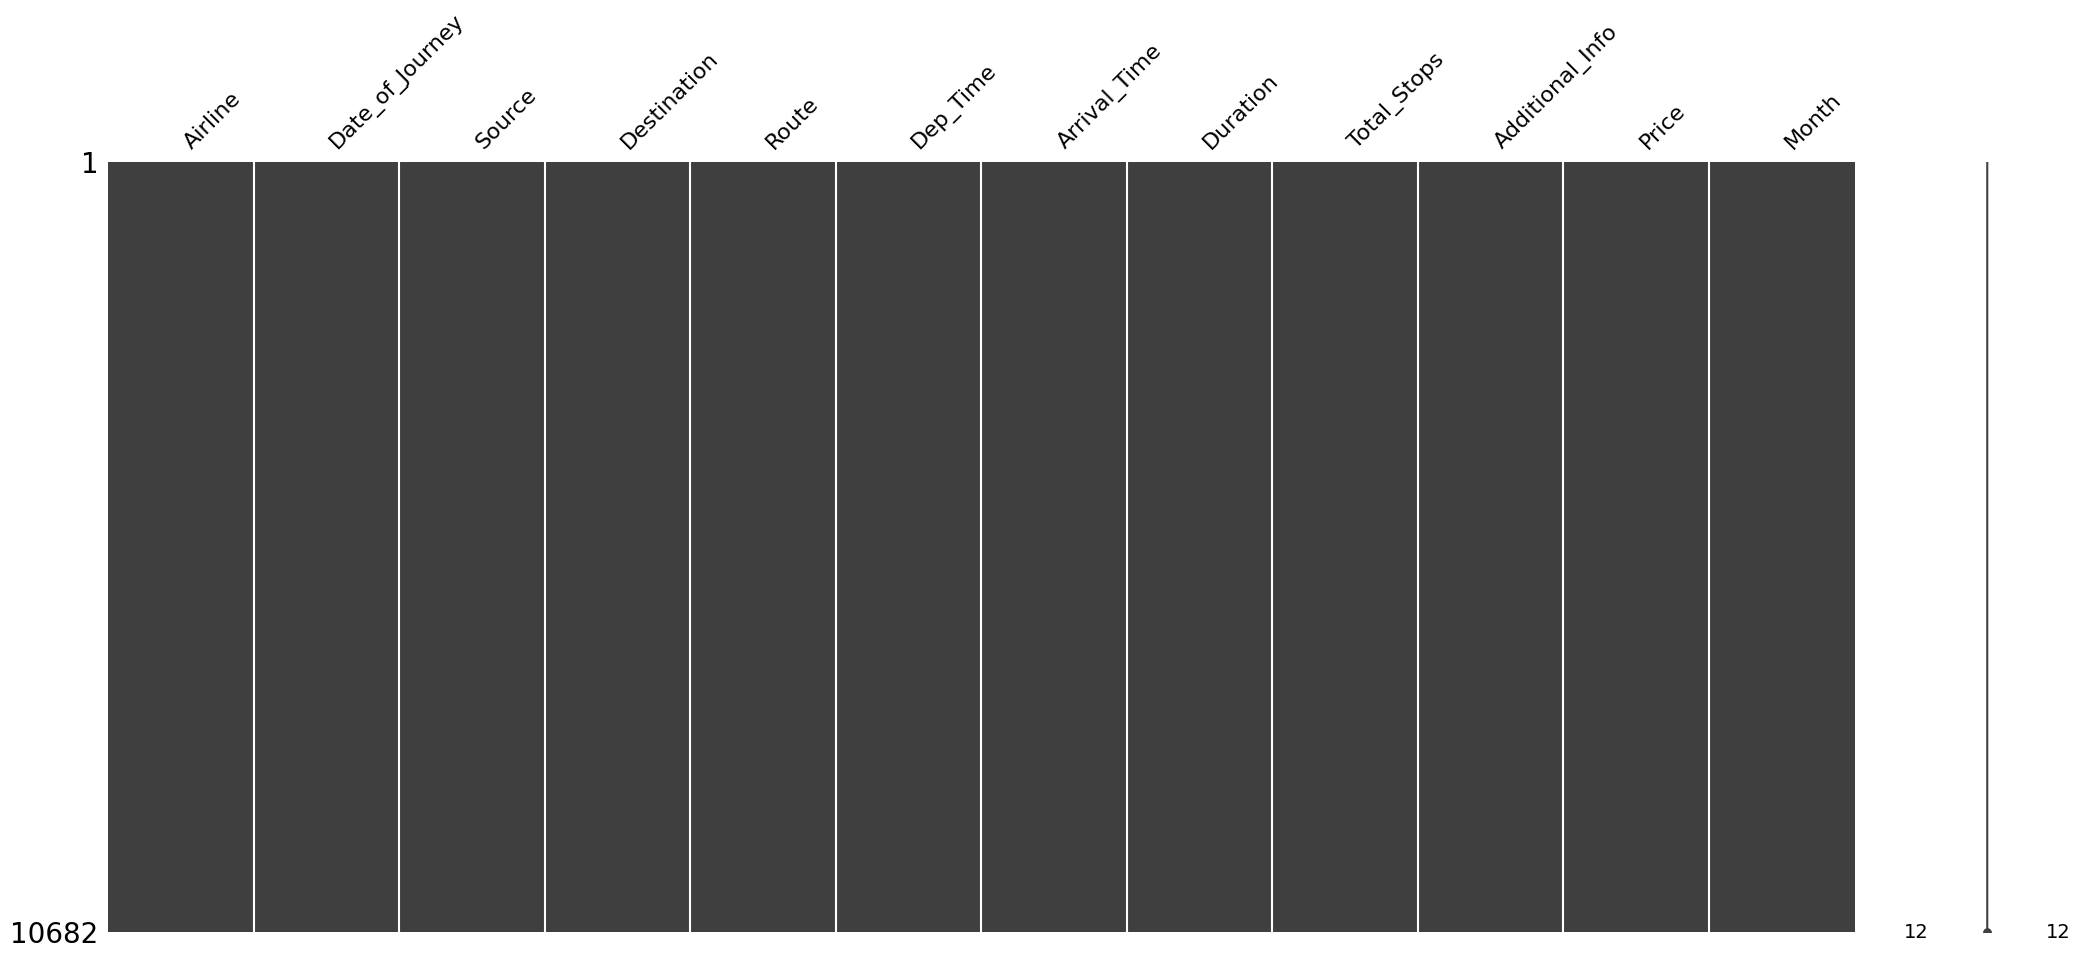

In [249]:
missingno.matrix(df)

In [250]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [251]:
df['Month'].unique()

array([3, 5, 6, 4], dtype=int32)

In [252]:
df.drop(columns='Date_of_Journey',inplace=True)

In [253]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2019-03-24 22:20:00,2019-03-25 01:10:00,0 days 02:50:00,0,No info,3897,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2019-05-01 05:50:00,2019-05-01 13:15:00,0 days 07:25:00,2,No info,7662,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2019-06-09 09:25:00,2019-06-10 04:25:00,0 days 19:00:00,2,No info,13882,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2019-05-12 18:05:00,2019-05-12 23:30:00,0 days 05:25:00,1,No info,6218,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2019-03-01 16:50:00,2019-03-01 21:35:00,0 days 04:45:00,1,No info,13302,3
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2019-04-09 19:55:00,2019-04-09 22:25:00,0 days 02:30:00,0,No info,4107,4
10679,Air India,Kolkata,Banglore,CCU → BLR,2019-04-27 20:45:00,2019-04-27 23:20:00,0 days 02:35:00,0,No info,4145,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,2019-04-27 08:20:00,2019-04-27 11:20:00,0 days 03:00:00,0,No info,7229,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,2019-03-01 11:30:00,2019-03-01 14:10:00,0 days 02:40:00,0,No info,12648,3


## Univariate

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


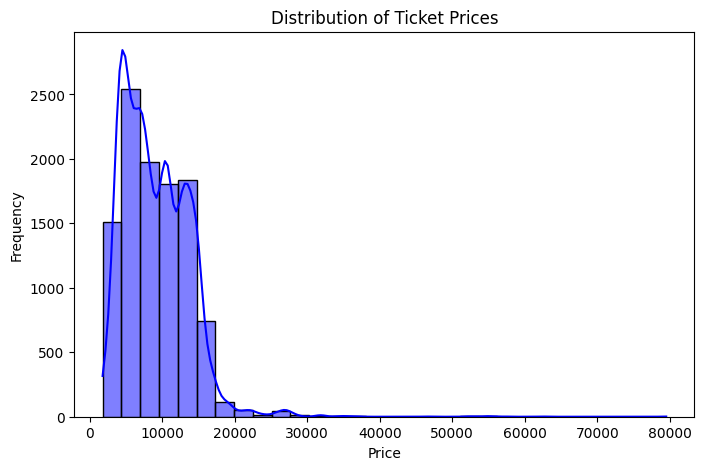

In [254]:
# 1. Histogram for Price
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Ticket Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

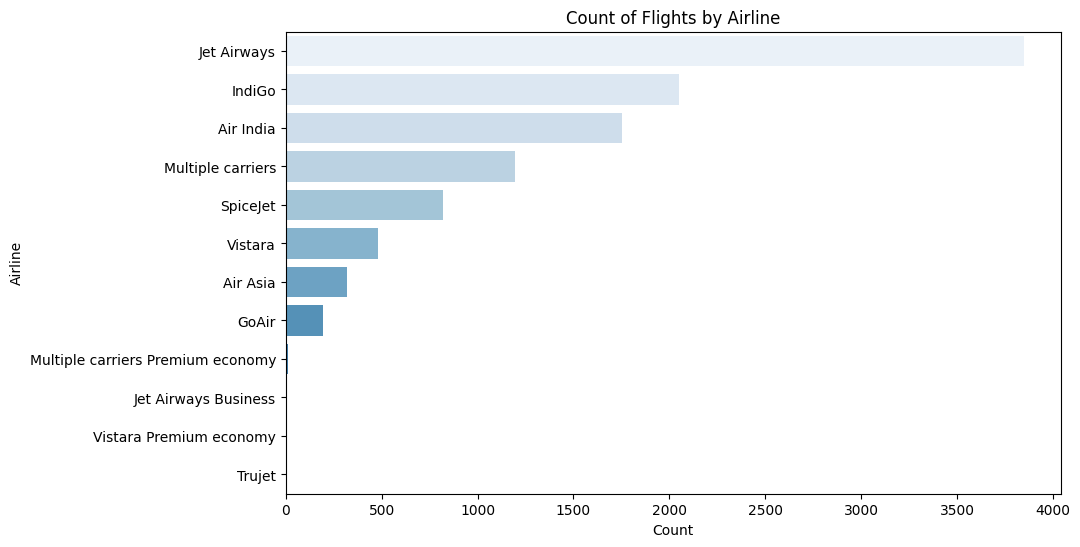

In [255]:
# 2. Bar chart for Airlines
plt.figure(figsize=(10, 6))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index, palette='Blues')
plt.title('Count of Flights by Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

In [259]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(1,2)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    plt.tight_layout()

<ipython-input-259-f2dec5c658e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


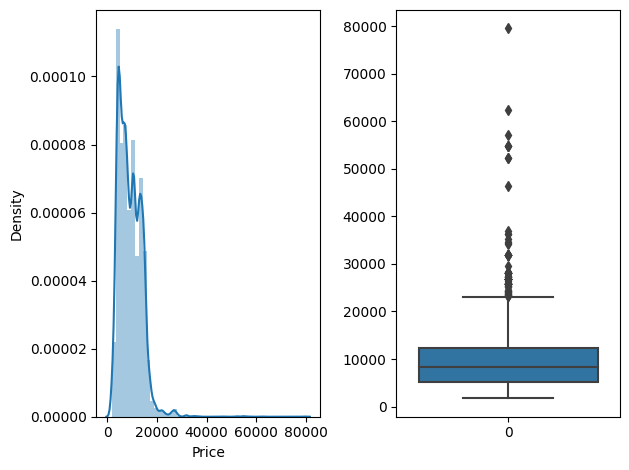

In [260]:
plot(df,'Price')

In [261]:
df['Price']=np.where(df['Price']>=40000,df['Price'].median(),df['Price'])

<ipython-input-259-f2dec5c658e8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col],ax=ax1)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


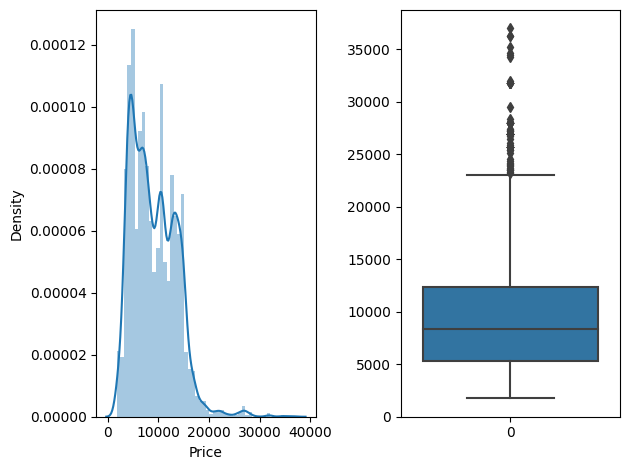

In [262]:
plot(df,'Price')

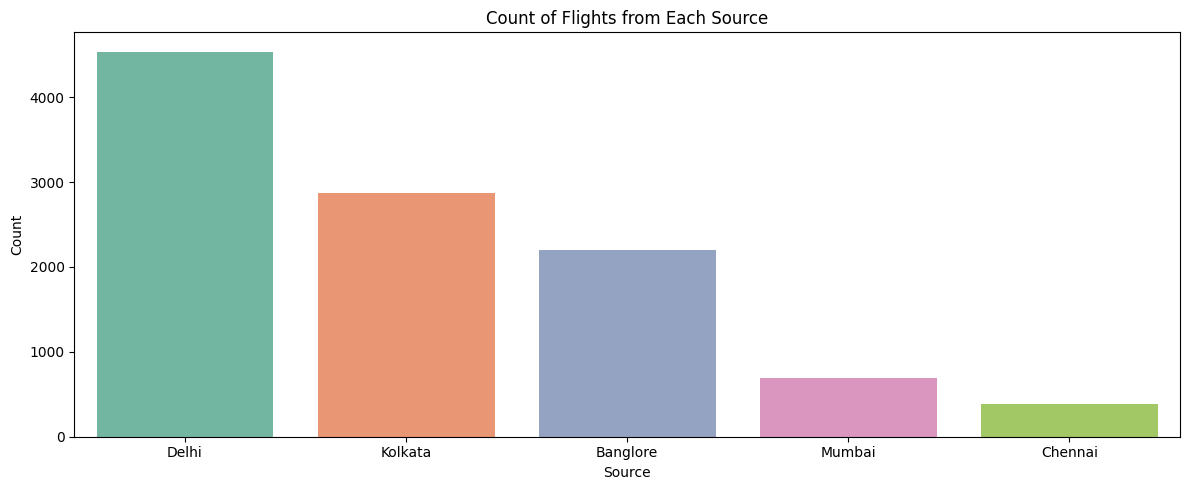

In [263]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Source', palette='Set2', order=df['Source'].value_counts().index)
plt.title('Count of Flights from Each Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

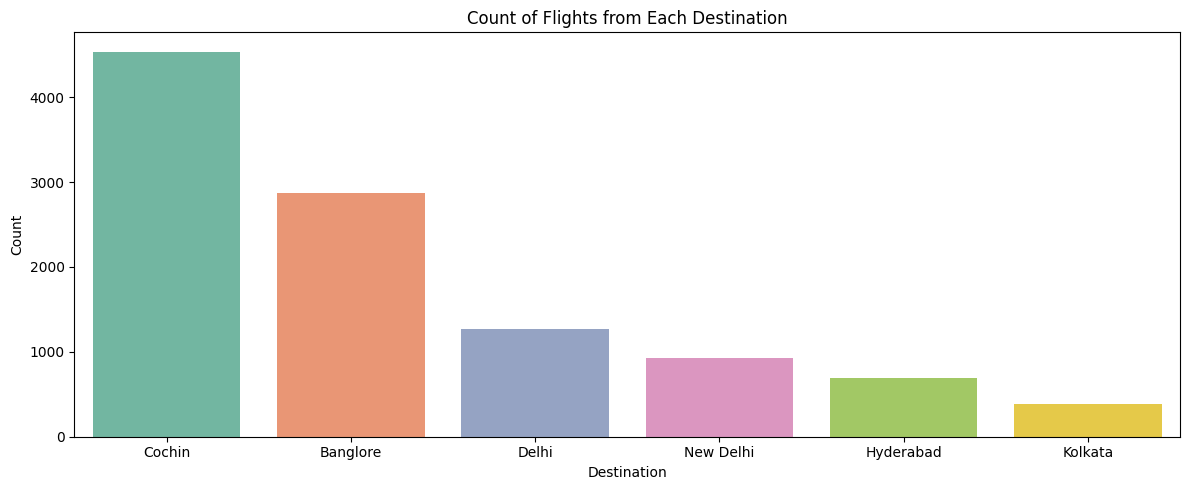

In [264]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Destination', palette='Set2', order=df['Destination'].value_counts().index)
plt.title('Count of Flights from Each Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

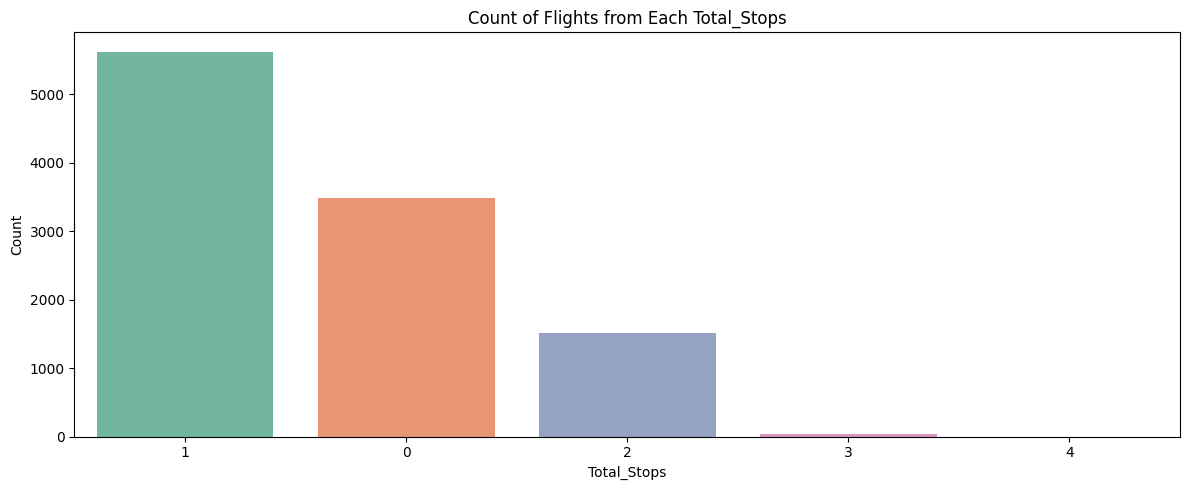

In [288]:
# 2. Bar Chart for Source and Destination
plt.figure(figsize=(12, 5))
sns.countplot(data=df, x='Total_Stops', palette='Set2', order=df['Total_Stops'].value_counts().index)
plt.title('Count of Flights from Each Total_Stops')
plt.xlabel('Total_Stops')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Bivariate

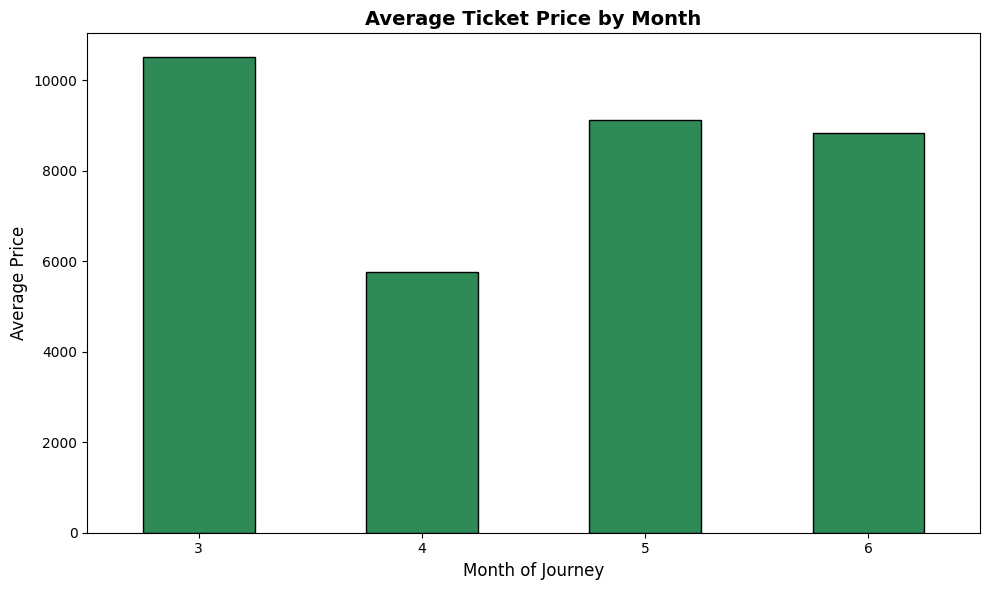

In [281]:
# Bivariate Analysis: Bar Chart for Month vs Average Price
plt.figure(figsize=(10, 6))
average_price_by_month = df.groupby('Month')['Price'].mean()  # Calculate average price per month
average_price_by_month.plot(kind='bar', color='seagreen', edgecolor='black')  # Create a bar chart

plt.title('Average Ticket Price by Month', fontsize=14, fontweight='bold')  # Enhanced title styling
plt.xlabel('Month of Journey', fontsize=12)  # Label for x-axis
plt.ylabel('Average Price', fontsize=12)  # Label for y-axis
plt.xticks(rotation=0, fontsize=10)  # Keep x-axis labels horizontal
plt.tight_layout()  # Ensure proper spacing
plt.show()


## Multivariate

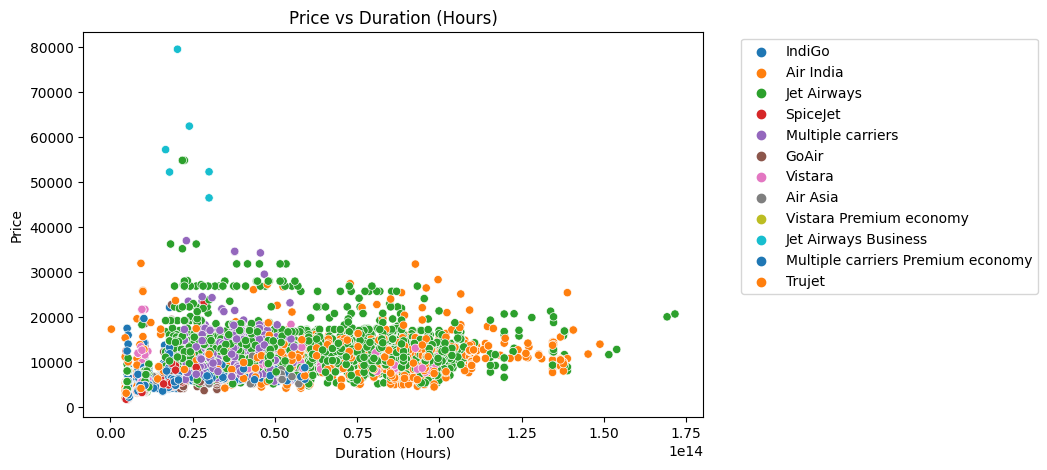

In [256]:
# 3. Scatter plot for Price vs Duration
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration', y='Price', data=df, hue='Airline', palette='tab10')
plt.title('Price vs Duration (Hours)')
plt.xlabel('Duration (Hours)')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


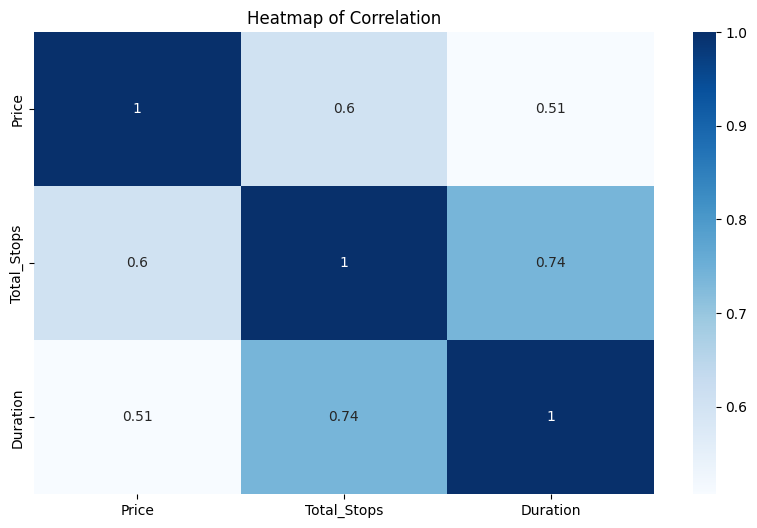

In [258]:
# Multivariate Analysis
# 5. Heatmap of Correlation between Numerical Features
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Price', 'Total_Stops', 'Duration']].corr(), annot=True, cmap='Blues')
plt.title('Heatmap of Correlation')
plt.show()

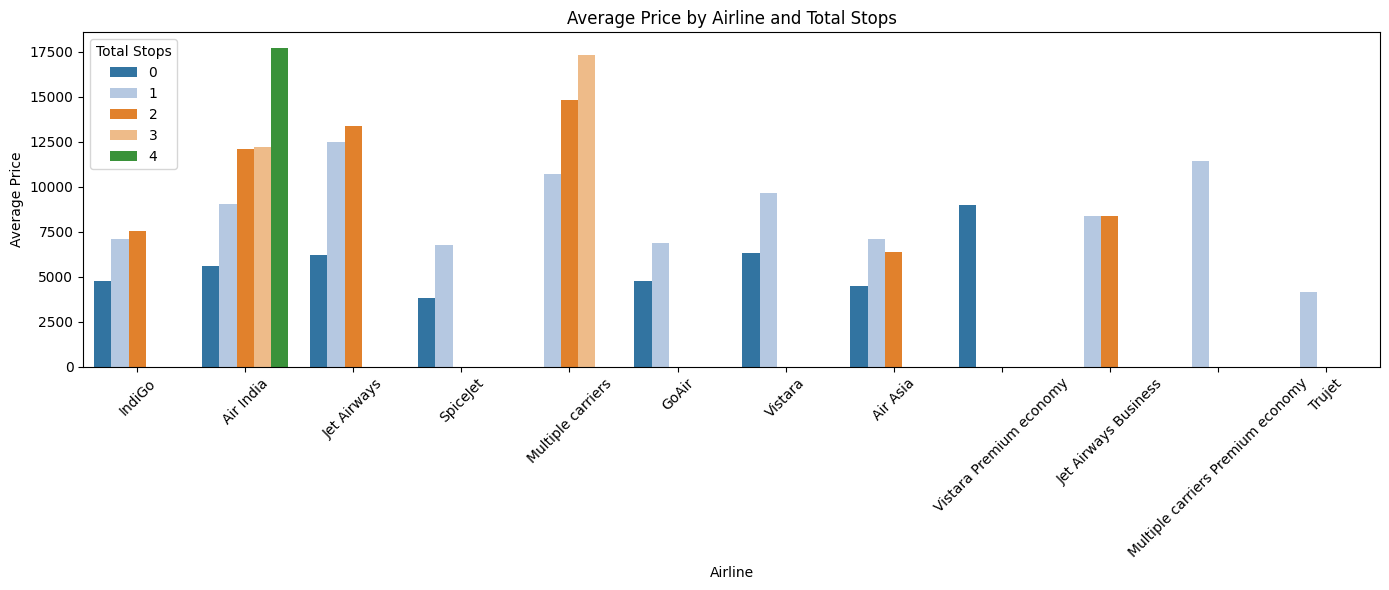

In [286]:
# 6. Grouped Bar Chart for Airline vs Price by Total Stops
plt.figure(figsize=(14, 6))
sns.barplot(x='Airline', y='Price', hue='Total_Stops', data=df, errorbar=None, palette='tab20')
plt.title('Average Price by Airline and Total Stops')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Total Stops')
plt.tight_layout()
plt.show()